# Regresión lineal del precio de la vivienda en EE. UU.

## Primer de regresión lineal

En estadística, la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente escalar y y una o más variables explicativas (o variables independientes) denominadas X. El caso de una variable explicativa se denomina regresión lineal simple. Para más de una variable explicativa, el proceso se denomina regresión lineal múltiple.

Los modelos de regresión lineal a menudo se ajustan utilizando el enfoque de mínimos cuadrados, pero también pueden ajustarse de otras formas, como minimizando la "falta de ajuste" en alguna otra norma (como con la regresión de desviaciones mínimas absolutas), o minimizando una penalización. versión de la función de pérdida por mínimos cuadrados como en la regresión de crestas (penalización de $L_2$ -norm) y lazo (penalización de $L_1$ -norm). Por el contrario, el enfoque de mínimos cuadrados se puede utilizar para ajustar modelos que no son modelos lineales. Por lo tanto, aunque los términos "mínimos cuadrados" y "modelo lineal" están estrechamente relacionados, no son sinónimos.

### Importando paquetes y el conjunto de datos

In [169]:
%pip install scipy

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [62]:
# df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/USA_Housing.csv")
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/healthcare_dataset.csv")

df.head()  # vemos los 5 primeros datos del dataframe

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


### Consultar información básica sobre el conjunto de datos

**El método 'info()'los tipos y números de datos**

In [63]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [64]:
df.describe()


,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


**El método 'columns' obtiene los nombres de las columnas (características)**

In [65]:
df.columns


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

### Visualización básica del conjunto de datos

**Pairplots usando seaborn**

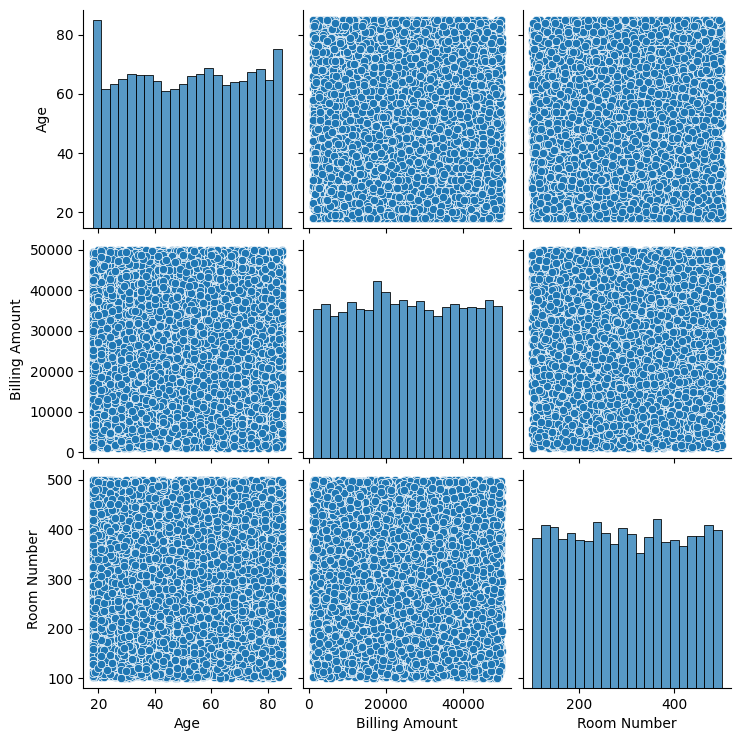

In [66]:
sns.pairplot(df)

**Distribución del precio (la cantidad prevista)**

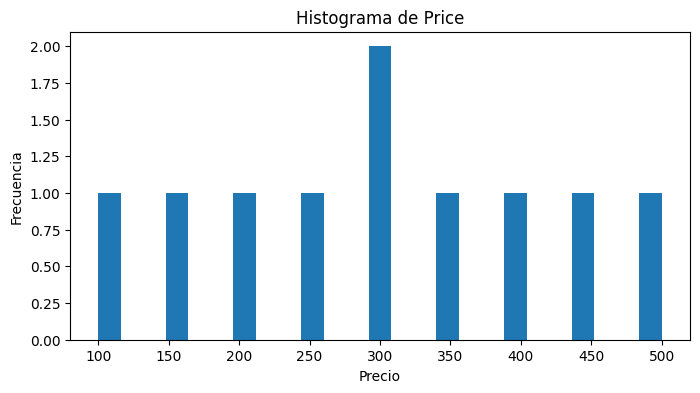

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame de ejemplo
data = {"Price": [100, 150, 200, 250, 300, 300, 350, 400, 450, 500]}
df = pd.DataFrame(data)

# Graficar histograma
df['Price'].plot.hist(bins=25, figsize=(8, 4))
plt.title("Histograma de Price")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


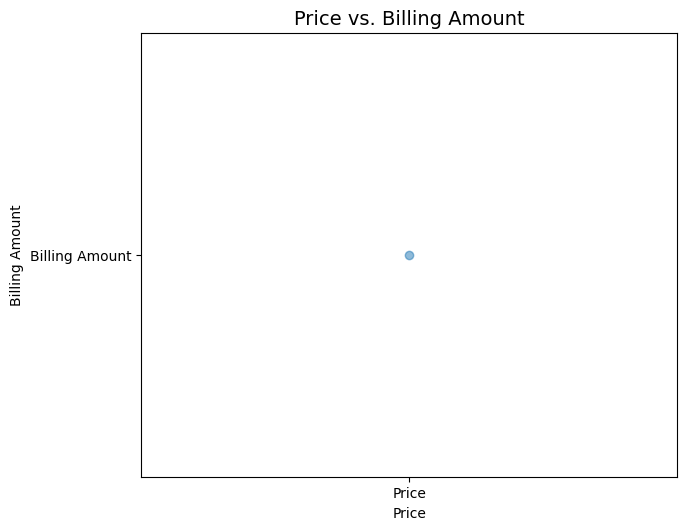

In [ ]:
import matplotlib.pyplot as plt

# Lista de columnas disponibles en tu DataFrame
l = list(df.columns)

# Número de variables que quieres graficar (ejemplo: 6 primeras)
n = 6
cols_to_plot = l[:n]

# Definir el grid: 2 filas x 3 columnas (ajusta según n)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # aplanar para iterar fácilmente

# Hacer scatter plot de cada columna contra "Billing Amount"
for i, col in enumerate(cols_to_plot):
    if col != "Billing Amount":  # evitar graficar la variable objetivo consigo misma
        axes[i].scatter([col], ["Billing Amount"], alpha=0.5)
        axes[i].set_title(f"{col} vs. Billing Amount", fontsize=14)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Billing Amount")

# Ocultar ejes vacíos si n < total de subplots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()











In [115]:
%pip install pandas

**Matriz de correlación y heatmap**

In [116]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Price
Price,1.0


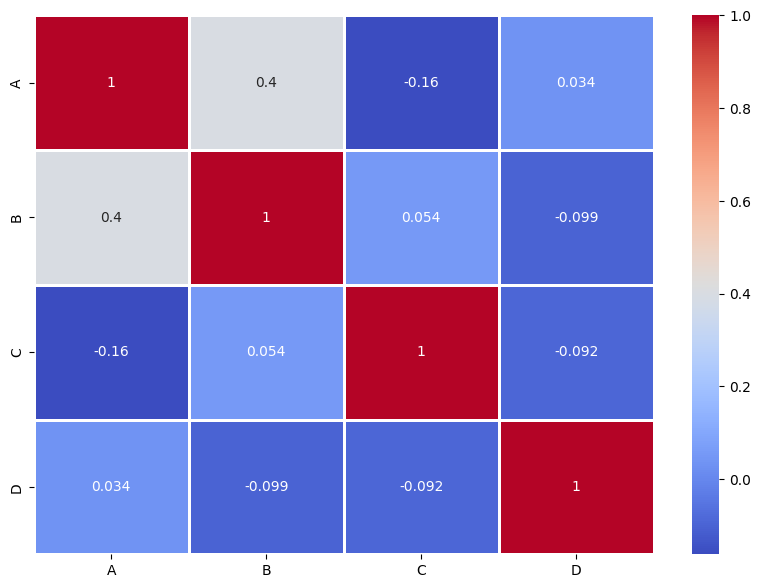

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame de ejemplo con datos numéricos
data = {
    "A": np.random.randint(1, 100, 20),
    "B": np.random.randint(1, 100, 20),
    "C": np.random.randint(1, 100, 20),
    "D": np.random.randint(1, 100, 20),
}
numeric_df = pd.DataFrame(data)

# Graficar heatmap de correlaciones
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2, cmap="coolwarm")
plt.show()



### Conjuntos de características y variables

**Haga una lista de los nombres de las columnas del dataframe**

In [118]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['Price']

**Coloque todas las características numéricas en X y el precio en y, ignore la dirección, que es una cadena para la regresión lineal**

In [119]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

In [27]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (5000, 5)
Tamaño de Variable Objetivo: (5000,)


In [121]:
X.head()

""
0
1
2
3
4


In [122]:
y.head()

0    100
1    150
2    200
3    250
4    300
Name: Price, dtype: int64

### División de entrenamiento-prueba

**Importamos la función train_test_split de scikit-learn**

In [123]:
!pip install scikit-learn


In [124]:
from sklearn.model_selection import train_test_split

**Creamos los conjuntos de entrenamiento X y de prueba y en un comando usando una proporción de división y una semilla aleatoria**

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


**Verifique el tamaño y la forma de las divisiones de entrenamiento/prueba (debe estar en la proporción según el parámetro test_size anterior)**

In [126]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (7, 0)
Tamaño del conjunto de características de prueba: (3, 0)
Tamaño de la variable objetivo del entrenamiento: (7,)
Tamaño de la variable objetivo de prueba: (3,)


### Ajuste y entrenamiento del modelo

**Importamos el estimador de modelo de regresión lineal de scikit-learn e lo instanciamos**

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [78]:
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

**Ajustamos el modelo al propio objeto instanciado**

In [83]:
import numpy as np

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)



**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [46]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: -2631028.90174549


In [47]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [48]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


### Cálculo de errores estándar y estadística t para los coeficientes

In [128]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


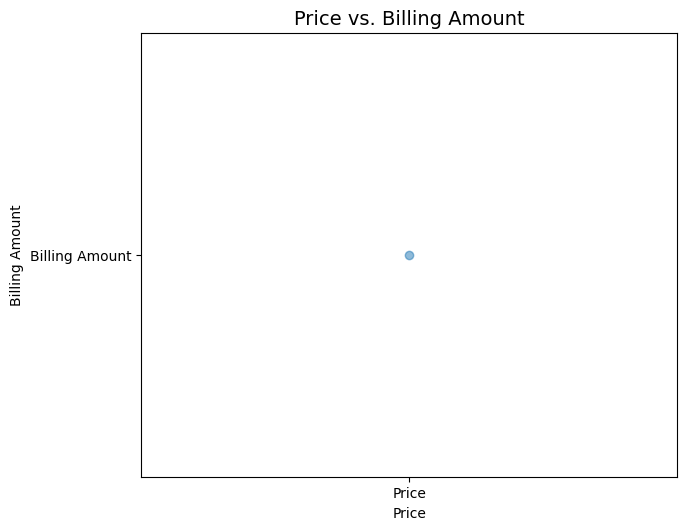

In [168]:
import matplotlib.pyplot as plt

# Lista de columnas disponibles en tu DataFrame
l = list(df.columns)

# Número de variables que quieres graficar (ejemplo: 6 primeras)
n = 6
cols_to_plot = l[:n]

# Definir el grid: 2 filas x 3 columnas (ajusta según n)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # aplanar para iterar fácilmente

# Hacer scatter plot de cada columna contra "Billing Amount"
for i, col in enumerate(cols_to_plot):
    if col != "Billing Amount":  # evitar graficar la variable objetivo consigo misma
        axes[i].scatter([col], ["Billing Amount"], alpha=0.5)
        axes[i].set_title(f"{col} vs. Billing Amount", fontsize=14)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Billing Amount")

# Ocultar ejes vacíos si n < total de subplots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()











**R cuadrado del ajuste del modelo**

In [52]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 0.917


### Matrices de evaluación de predicción, estimación de error y regresión

**Predicción usando el modelo lm**

In [90]:
import numpy as np
X_test = np.array(X_test).reshape(-1, 1)



**Diagrama de dispersión (Scatterplot) del precio previsto y el conjunto de prueba y para ver si los datos caen en una línea recta de 45 grados**

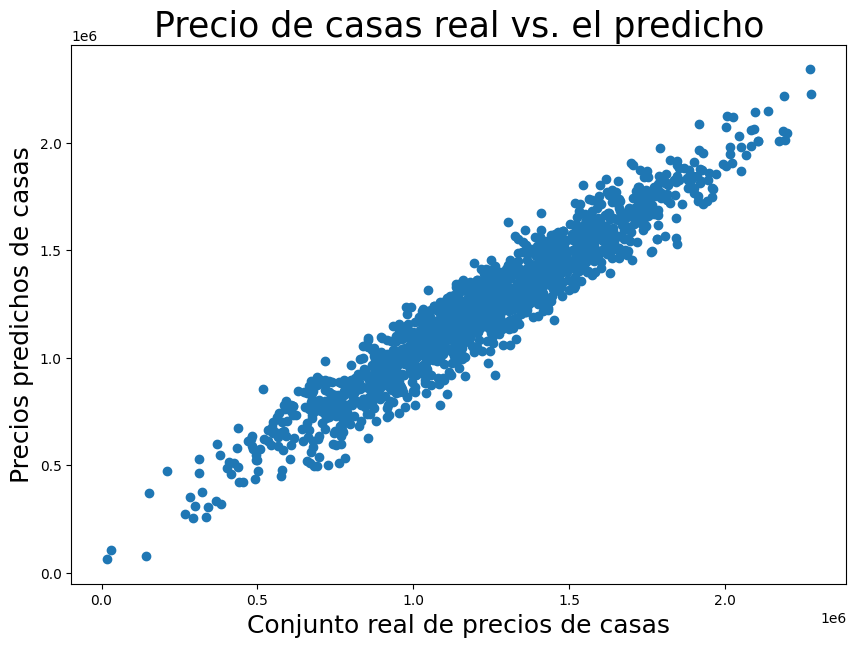

In [54]:
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Visualizamos el histograma de los residuos, es decir, errores predichos (se espera un patrón distribuido normalmente)**

In [95]:
print(type(y_test), y_test.shape)
print(type(predictions), predictions.shape)





<class 'pandas.core.series.Series'> (3,)
<class 'numpy.ndarray'> (1500,)


**Diagrama de dispersión de residuos y valores predichos (Homoscedasticidad)**


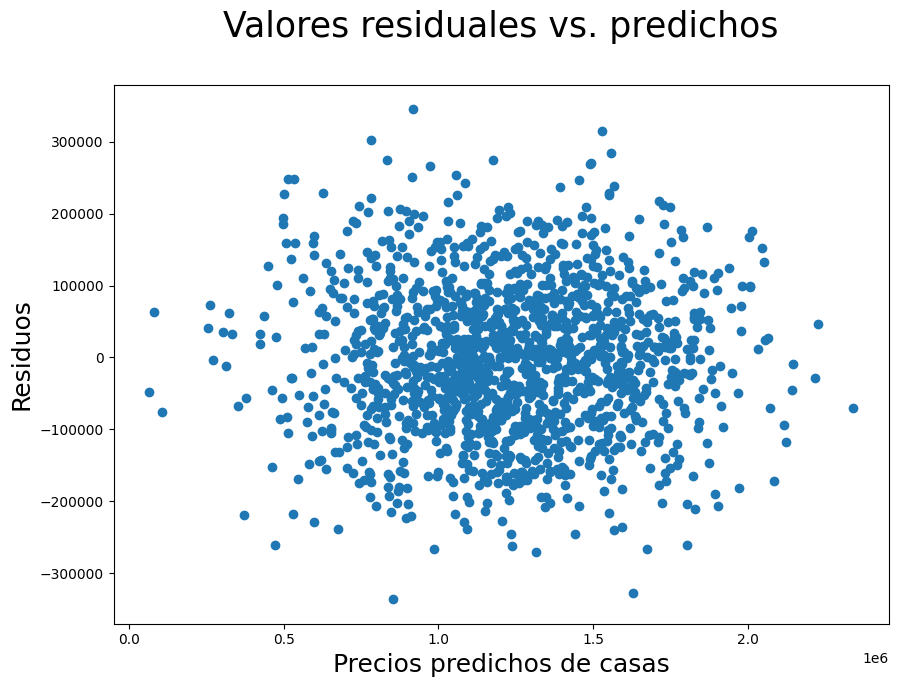

In [56]:
plt.figure(figsize=(10,7))
plt.title("Valores residuales vs. predichos\n",fontsize=25)
plt.xlabel("Precios predichos de casas",fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

**Métricas de evaluación de la regresión**

In [107]:
from sklearn import metrics


**Valor R cuadrado**

In [108]:
print("Tipo de y_test:", type(y_test))
print("Forma de y_test:", getattr(y_test, "shape", None))

print("Tipo de predictions:", type(predictions))
print("Forma de predictions:", getattr(predictions, "shape", None))



Tipo de y_test: <class 'numpy.ndarray'>
Forma de y_test: (3,)
Tipo de predictions: <class 'numpy.ndarray'>
Forma de predictions: (1500,)
